### Imports

In [17]:
import numpy as np
import pandas as pd

import gym
import gym_anytrading
import quantstats as qs

import matplotlib.pyplot as plt

from stable_baselines3 import A2C
from stable_baselines3.common.vec_env import DummyVecEnv

### Create Env

In [28]:
selection = 0
tickers = ['NESZ', 'CIMB', 'MAY', 'KLK']
tickers = [tickers[0]]

df = {}
for ticker in tickers:
    df[ticker] = pd.read_csv('day_data/{} MK Equity.csv'.format(ticker),parse_dates=True, index_col='Dates')

train_pct = 0.8
      
window_size = 10
start_index = window_size
end_index = len(df[tickers[selection]])

cutoff = int(end_index * train_pct)

env_maker_train = lambda: gym.make(
    'daily-v0',
    df = df, 
    window_size = window_size,
    frame_bound = (start_index, cutoff),
    bankroll=100000.
)

env_train = DummyVecEnv([env_maker_train])

env_maker_val = lambda: gym.make(
    'daily-v0',
    df = df, 
    window_size = window_size,
    frame_bound = (cutoff + window_size, end_index),
    bankroll=100000.
)

env_val = DummyVecEnv([env_maker_val])

NESZ
Continuous action space
NESZ
Continuous action space


### Train Env

In [29]:
#policy_kwargs = dict(net_arch=[64, 'lstm', dict(vf=[128, 128, 128], pi=[64, 64])])
model = A2C('MlpPolicy', env_train, verbose=1)# , policy_kwargs=policy_kwargs)
model.learn(total_timesteps=1000)

Using cpu device
------------------------------------
| time/                 |          |
|    fps                | 2559     |
|    iterations         | 100      |
|    time_elapsed       | 0        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -2.8     |
|    explained_variance | -0.0232  |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | -0.18    |
|    std                | 0.982    |
|    value_loss         | 0.00321  |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2705     |
|    iterations         | 200      |
|    time_elapsed       | 0        |
|    total_timesteps    | 1000     |
| train/                |          |
|    entropy_loss       | -2.8     |
|    explained_variance | 4.77e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 199      |
|    policy_loss     

### Custom Model

### Test Env

In [35]:
env = env_maker_val() # _train/val
observation = env.reset()
print(observation[np.newaxis, ...])

c = 0
while True:
    c+=1
    action, _states = model.predict(observation)
   
    #print(action)
    observation, reward, done, info = env.step(action)

    #env.render()
    if done:
        print("info:", info)
        print("iterations", c)
        break

NESZ
Continuous action space
[[[[ 7.940e+01  0.000e+00]]

  [[ 7.940e+01  0.000e+00]]

  [[ 7.942e+01  2.000e-02]]

  [[ 7.980e+01  3.800e-01]]

  [[ 7.988e+01  8.000e-02]]

  [[ 8.000e+01  1.200e-01]]

  [[ 8.000e+01  0.000e+00]]

  [[ 8.198e+01  1.980e+00]]

  [[ 8.120e+01 -7.800e-01]]

  [[ 8.034e+01 -8.600e-01]]]]
info: {'total_reward': 35166.04000000001, 'total_profit': 35166.04000000001, 'position': array([  31.84, 1013.  ]), 'delta': array([0., 0.]), 'net_worth': 135166.0400000003}
iterations 1114


### Plot Results

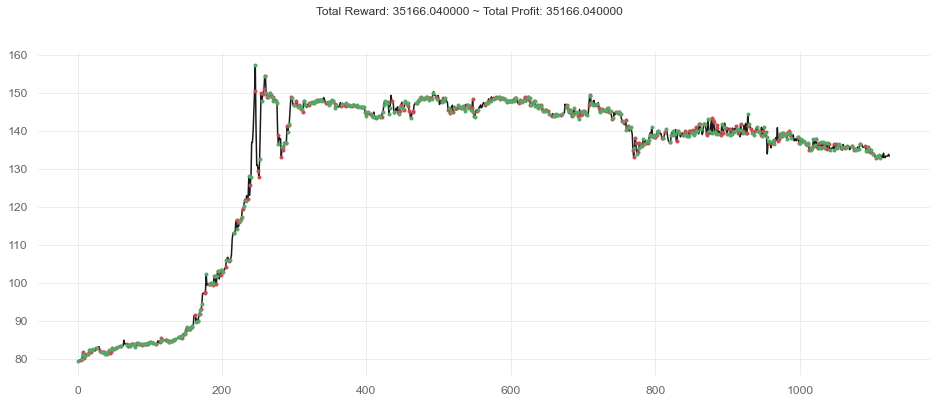

In [36]:
plt.figure(figsize=(16, 6))
env.render_all()
plt.show()

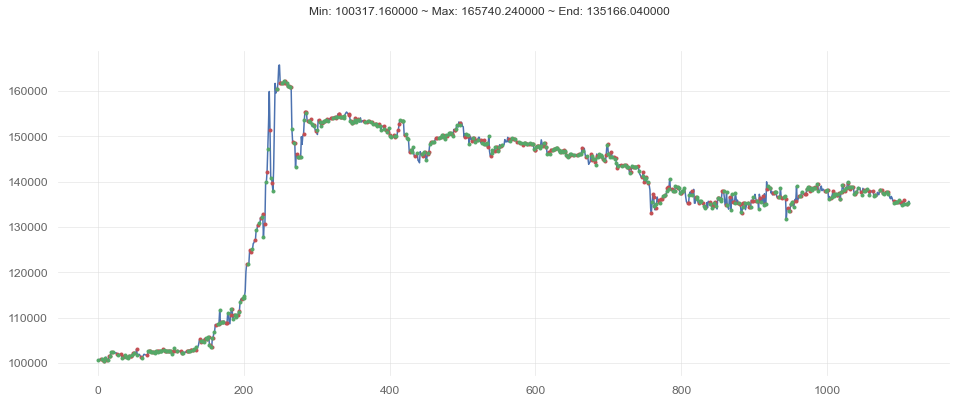

In [37]:
plt.figure(figsize=(16, 6))
env.render_net_worth()
plt.show()

In [16]:
print(np.array(env.history['position'])[:,0].mean())
print(np.array(env.history['net_worth']).mean())
#np.array(env.history['position'])[:,0].min()

103732.18882898957
111124.20786504811


In [5]:
class CustomModel:
    # Buy and Hold
    def __init__(self, env, strategy='buy and hold'):
        self.env = env        
        strategies = ['buy and hold', 'overnight', 'intraday', 'random walk']
        self.strategy = strategies.index(strategy)
    def learn(self, total_timesteps=1000):
        pass
    def predict(self, observation):
        if self.strategy == 0:
            return 1, None
        elif self.strategy == 1:
            pass 
        elif self.strategy == 2:
            pass
        elif self.strategy == 3:
            pass
    

# model = CustomModel(env)

### Analysis Using `quantstats`

                           Strategy
-------------------------  ----------
Start Period               2000-01-19
End Period                 2017-03-31
Risk-Free Rate             0.0%
Time in Market             53.0%

Cumulative Return          146.89%
CAGR﹪                     5.39%

Sharpe                     0.46
Smart Sharpe               0.39
Sortino                    0.65
Smart Sortino              0.55
Sortino/√2                 0.46
Smart Sortino/√2           0.39
Omega                      1.13

Max Drawdown               -25.84%
Longest DD Days            1428
Volatility (ann.)          12.9%
Calmar                     0.21
Skew                       -1.38
Kurtosis                   77.39

Expected Daily %           0.02%
Expected Monthly %         0.44%
Expected Yearly %          5.15%
Kelly Criterion            6.18%
Risk of Ruin               0.0%
Daily Value-at-Risk        -1.31%
Expected Shortfall (cVaR)  -1.31%

Gain/Pain Ratio            0.13
Gain/Pain (1M)             

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2000-02-11,2000-07-03,2004-01-09,1428,-25.838430,-19.352653
2,2007-12-07,2007-12-11,2009-03-02,451,-20.286700,-19.512788
3,2005-08-16,2006-06-13,2007-12-06,842,-18.065553,-17.698174
4,2012-11-01,2012-11-23,2013-04-19,169,-11.489327,-11.429293
5,2004-11-22,2005-06-01,2005-08-12,263,-10.215703,-9.441711


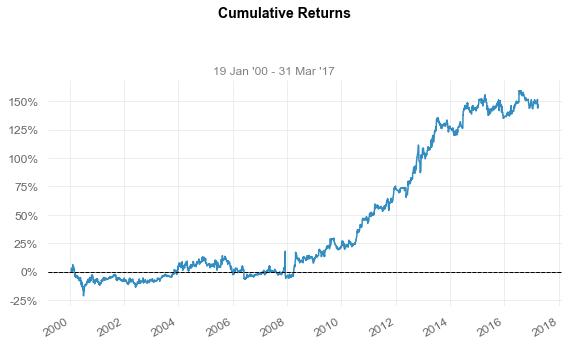

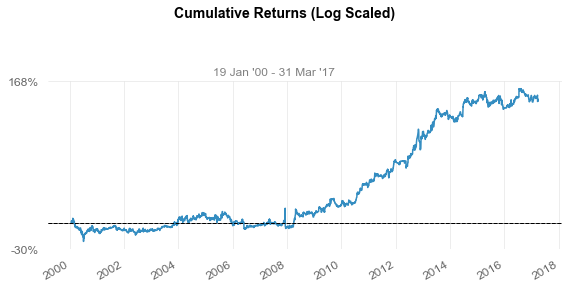

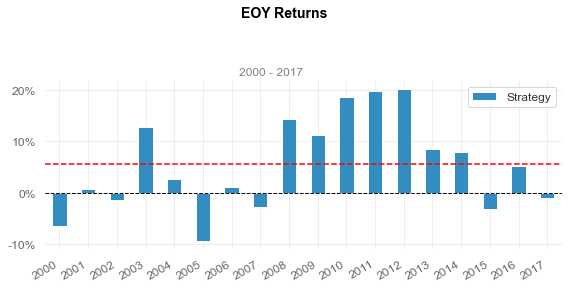

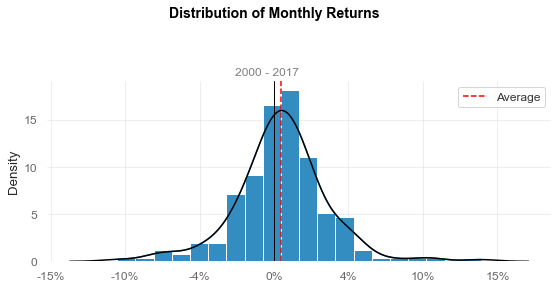

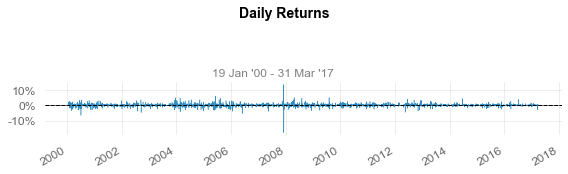

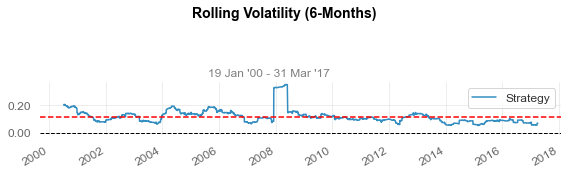

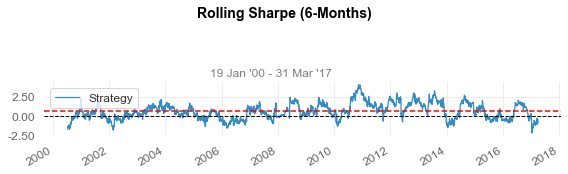

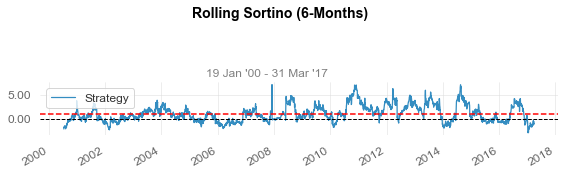

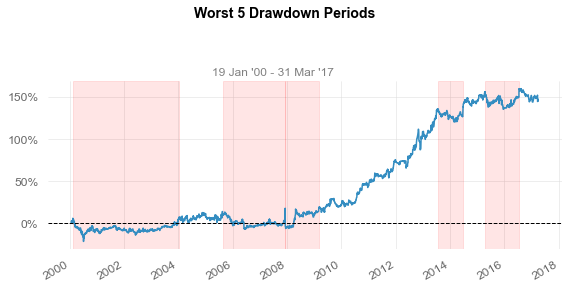

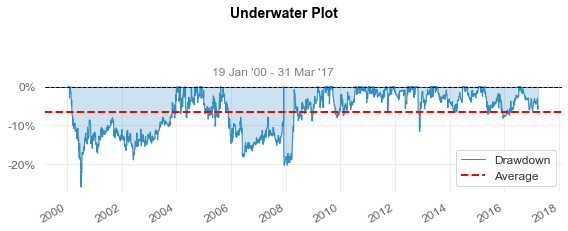

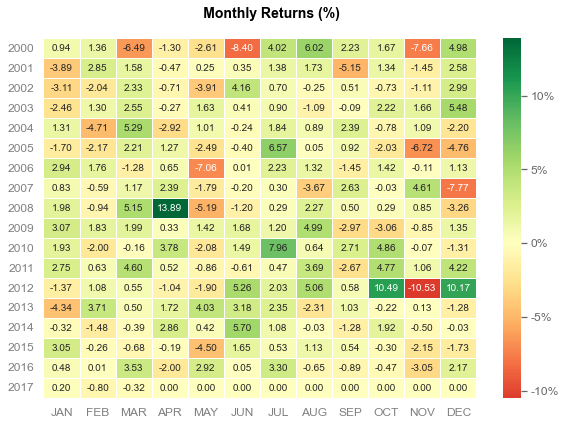

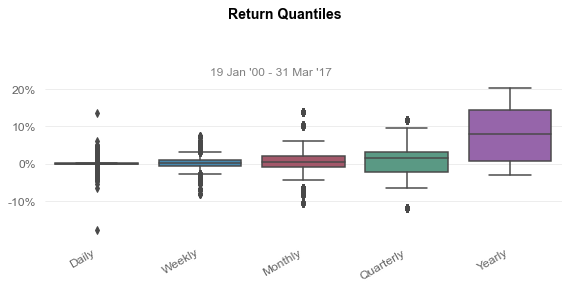

In [34]:
qs.extend_pandas()

net_worth = pd.Series(np.array(env.history['net_worth']), index=df['NESZ'].index[start_index+1:cutoff] )#df['CIMB'].index[start_index+1:end_index])
returns = net_worth.pct_change().iloc[1:]

qs.reports.full(returns)
#qs.reports.html(returns, output=True, download_filename='custom_quantstats.html')